# Curso de Visão computacional: detecção de texto em placas de carro

#### Importação de biblitecas:

In [1]:
import pytesseract
import cv2
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import clear_border

print("pytesseract version: ", pytesseract.__version__)
print("OpenCV version: ", cv2.__version__)

pytesseract version:  0.3.9
OpenCV version:  4.6.0


## Aula 01 - Importando e Visualizando Imagens

In [2]:
def display_image(image, size: tuple = (10,10)):
    plt.figure(figsize=size)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()

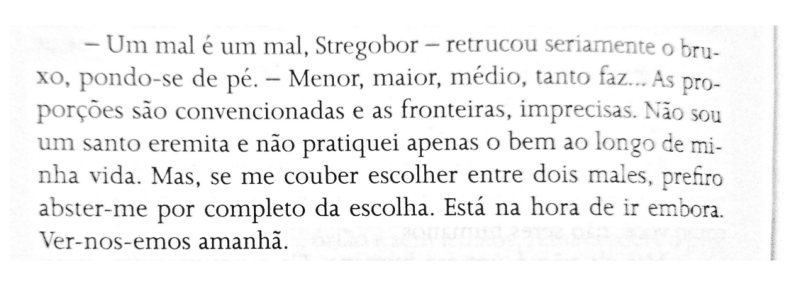

In [3]:
imagem = cv2.imread(r"imagens\trecho_livro.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
display_image(imagem)

In [4]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [5]:
texto = pytesseract.image_to_string(imagem, lang="por", config="--psm 6")
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. :
Ver-nos-emos amanhã.



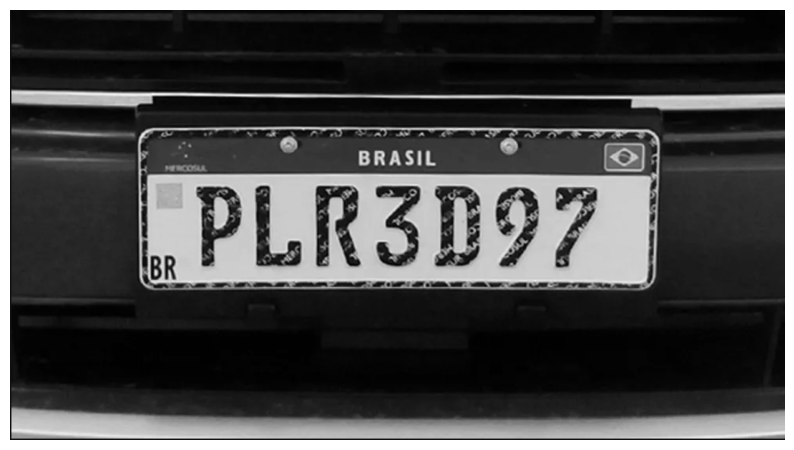

In [6]:
imagem = cv2.imread(r"imagens\placa_carro1.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
display_image(imagem)

In [7]:
texto = pytesseract.image_to_string(imagem, lang="por", config="--psm 3")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

-- TEXTO NÃO ENCONTRADO --


## Aula 02 - Limiarização

A ideia básica por trás do thresholding é converter uma imagem em escala de cinza em uma imagem binária, onde os pixels são classificados como preto ou branco, dependendo se eles estão acima ou abaixo de um determinado limite de intensidade.

### Limiarização Simples

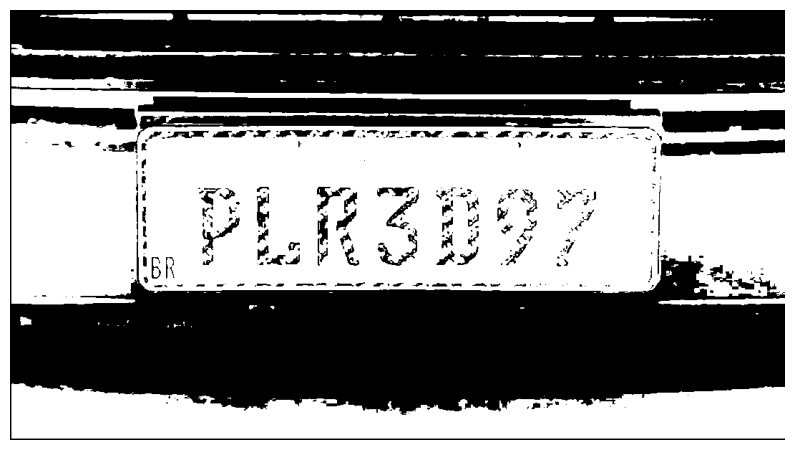

In [8]:
limiar = 25
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
display_image(lim_simples)

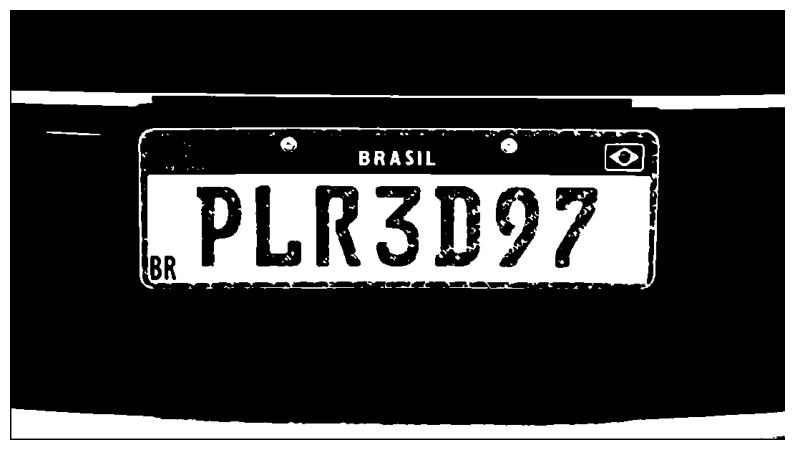

In [9]:
limiar = 127
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
display_image(lim_simples)

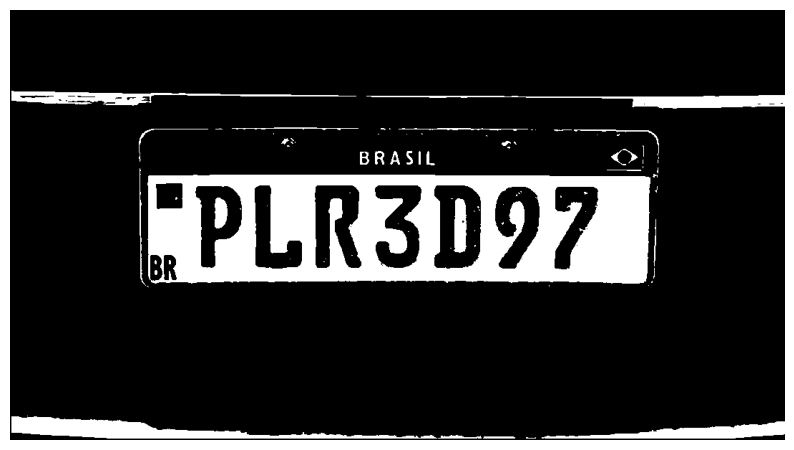

In [10]:
limiar = 170
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
display_image(lim_simples)

In [11]:
texto = pytesseract.image_to_string(lim_simples, lang="por", config="")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

CEE —— O

BRASIL

FPLR3D97 | |

a




### Limiarização Adaptativa

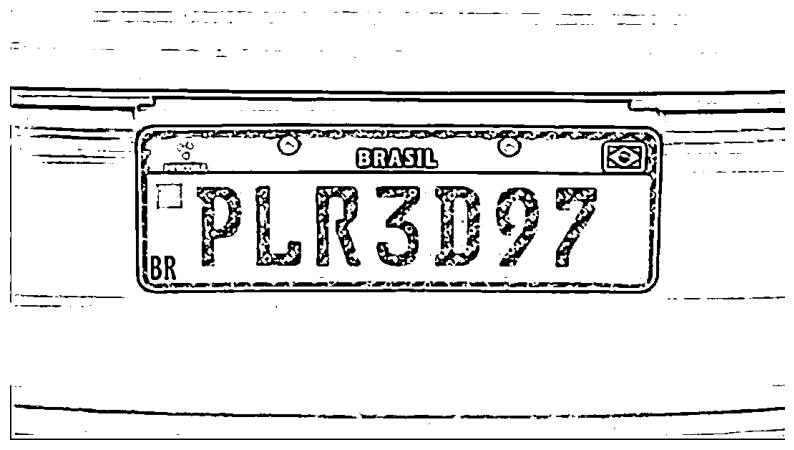

In [12]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
display_image(lim_adapt)

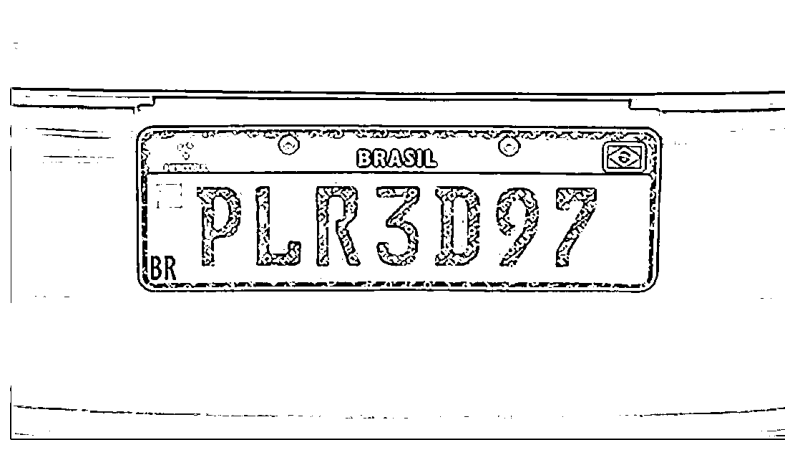

In [13]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
display_image(lim_adapt)

### Limiarização de Otsu

É um método automático para calcular um valor de limiar ótimo em uma imagem em escala de cinza.

limiar de Otsu:  96.0


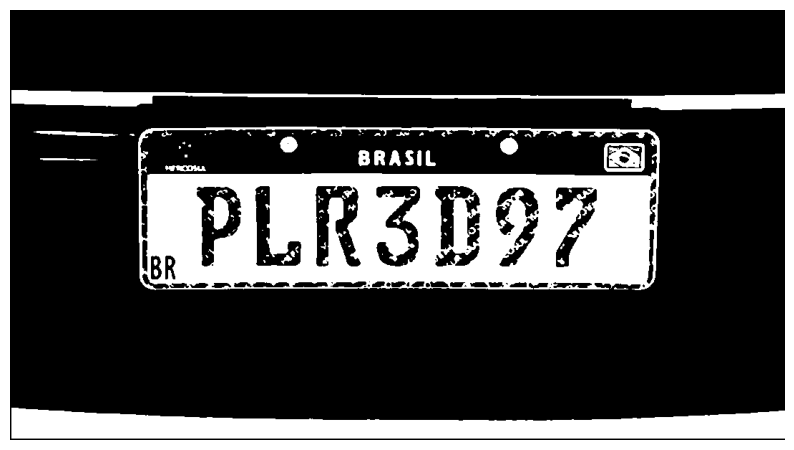

In [14]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("limiar de Otsu: ", valor)
display_image(lim_otsu)

In [15]:
texto = pytesseract.image_to_string(lim_otsu, lang="por", config="")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

-- TEXTO NÃO ENCONTRADO --


## Aula 03 - Transformação Morfologica

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

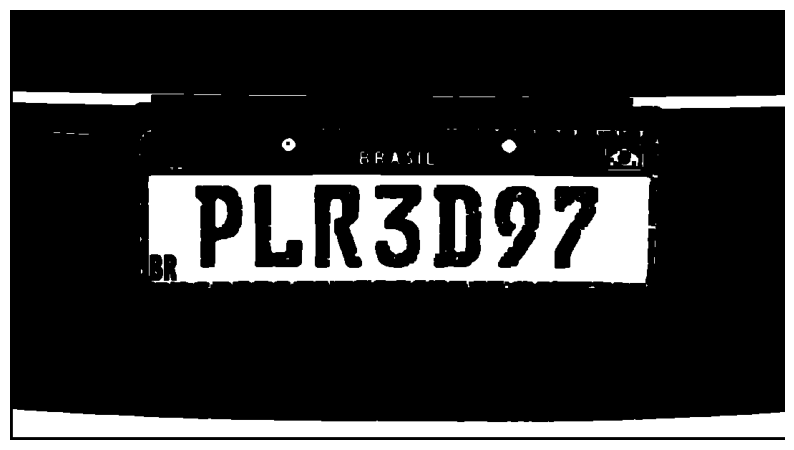

In [17]:
erosao = cv2.erode(lim_otsu, kernel)
display_image(erosao)

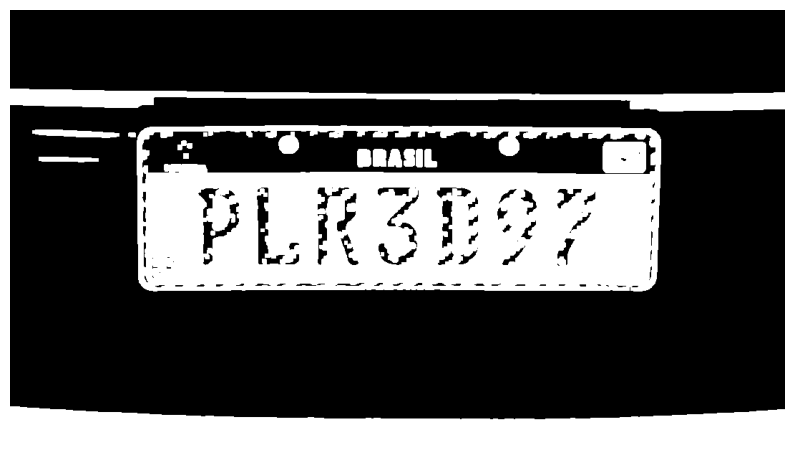

In [18]:
dilatacao = cv2.dilate(lim_otsu, kernel)
display_image(dilatacao)

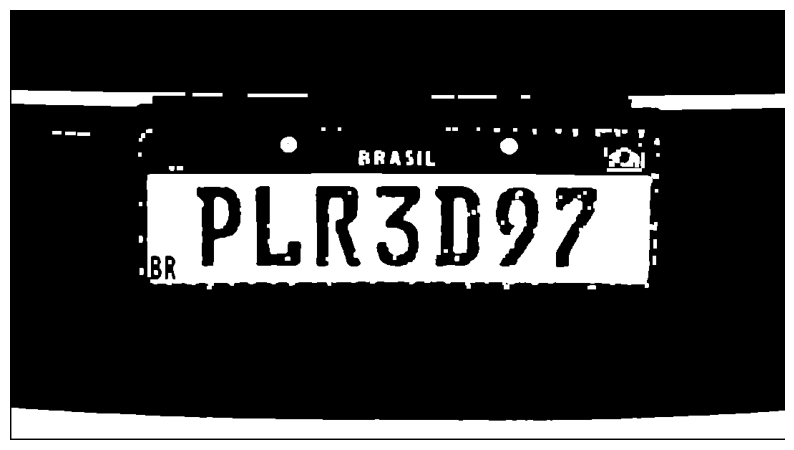

In [19]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
display_image(abertura)

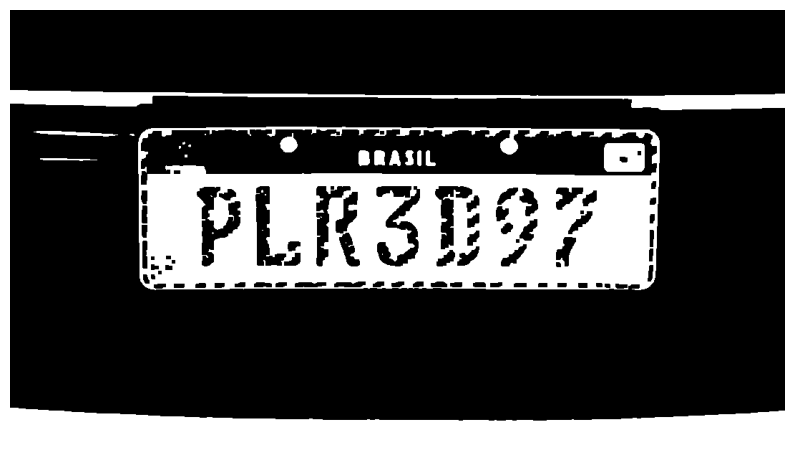

In [20]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
display_image(fechamento)

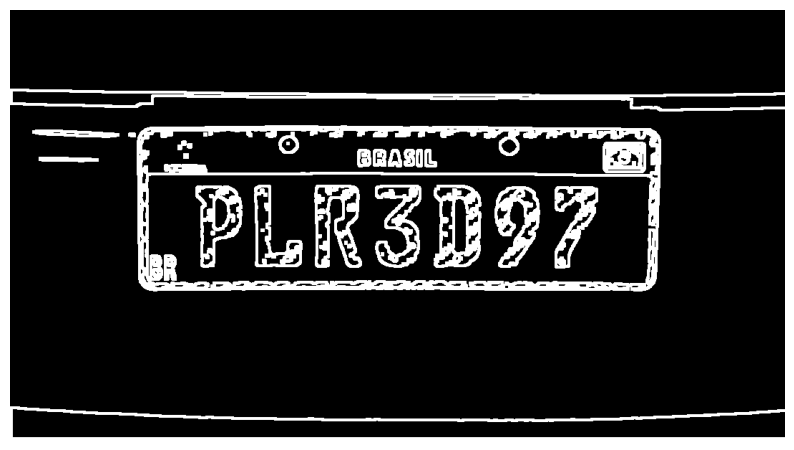

In [21]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
display_image(gradiente)

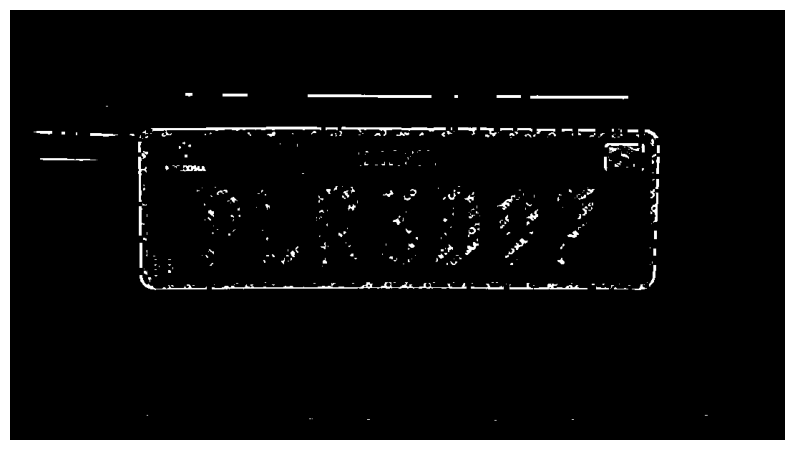

In [22]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
display_image(cartola)

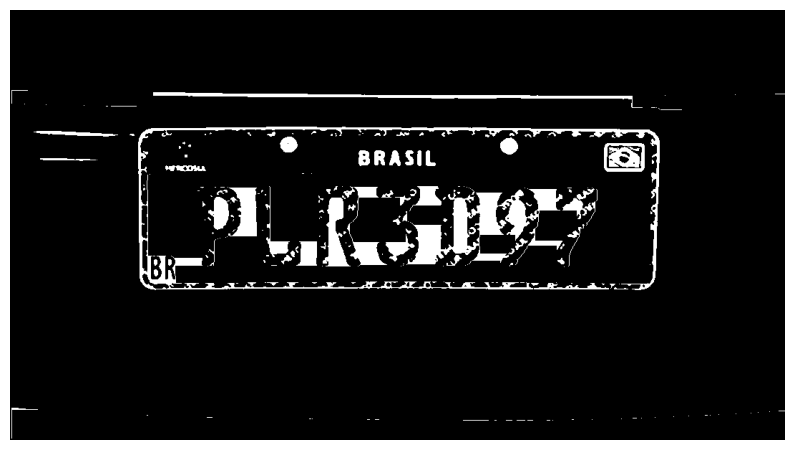

In [23]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
display_image(cartola)

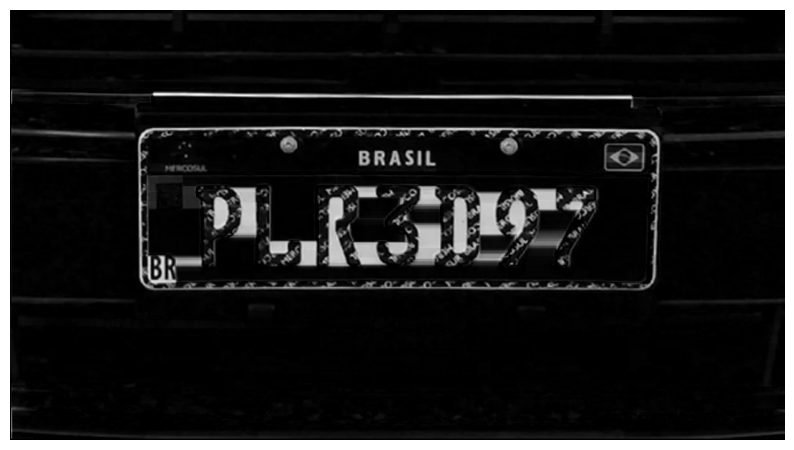

In [24]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(imagem, cv2.MORPH_TOPHAT, kernel_retangular)
display_image(cartola)

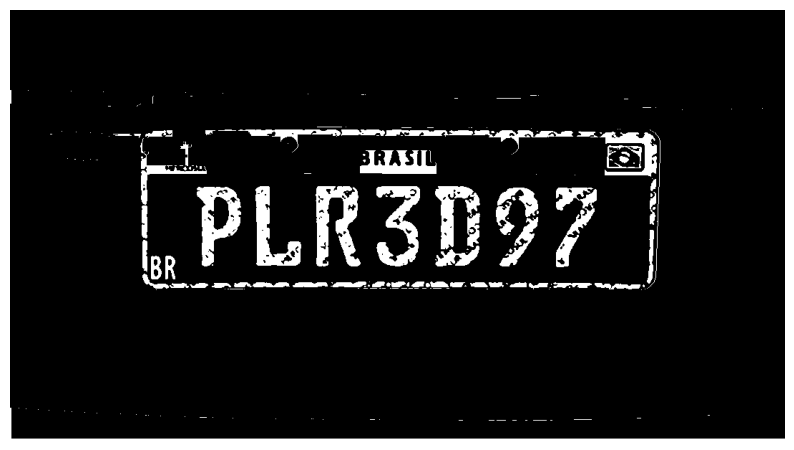

In [25]:
chapeu_preto = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
display_image(chapeu_preto)

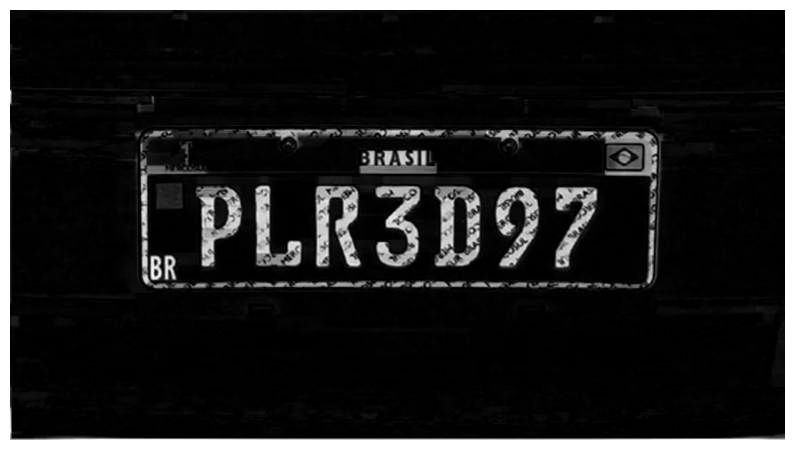

In [26]:
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
display_image(chapeu_preto)

In [27]:
texto = pytesseract.image_to_string(erosao, lang="por", config="--psm 6")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

| PLRSD97;
(TT



## Aula 04 - Detecção da Placa

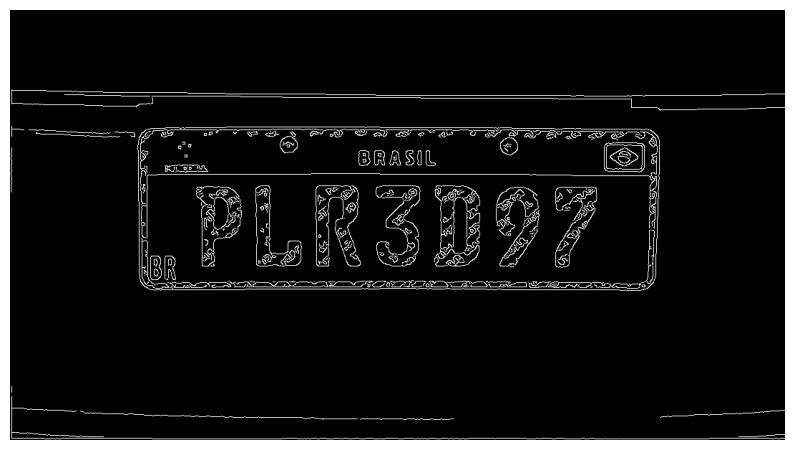

In [28]:
bordas = cv2.Canny(imagem, 100, 200)
display_image(bordas)

In [29]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [30]:
# Verifica se algum contorno é convexo e tem 4 lados e retorna a localização desse contorno

for contorno in contornos:
    episolon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, episolon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

print(localizacao)

[[[180 178]]

 [[196 391]]

 [[901 375]]

 [[894 168]]]


In [31]:
x, y, w, h = cv2.boundingRect(localizacao)
for elemento in [x, y, w, h]:
    print(elemento)

180
168
722
224


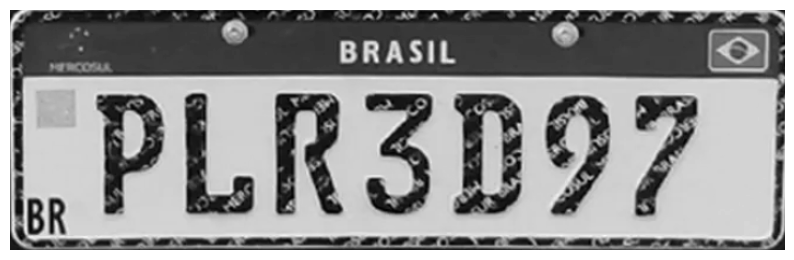

In [32]:
placa = imagem[y:y+h, x:x+w]
display_image(placa)

Limiarização, Erosão e Tesseract

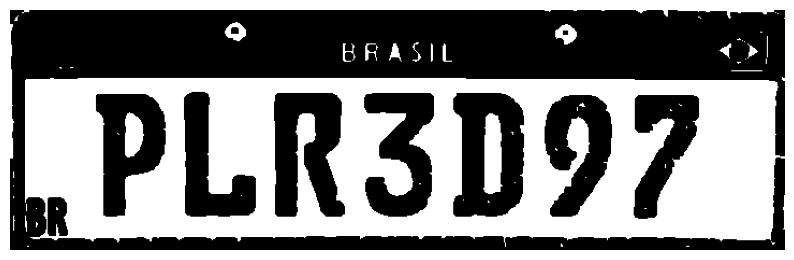

In [33]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
display_image(erosao)

In [34]:
texto = pytesseract.image_to_string(erosao, lang="por", config="--psm 6")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

 PLR3D97.



In [35]:
texto_extraido = re.search(r'\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido)
print(texto_extraido.group(0))

<re.Match object; span=(1, 8), match='PLR3D97'>
PLR3D97


### Aplicando as tecnicas em outro cenário

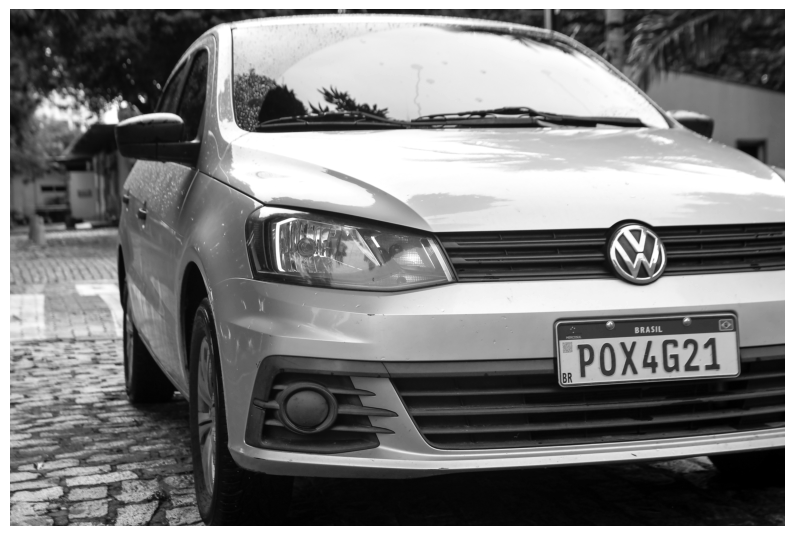

In [36]:
imagem = cv2.imread("imagens\placa_carro2.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
display_image(imagem)

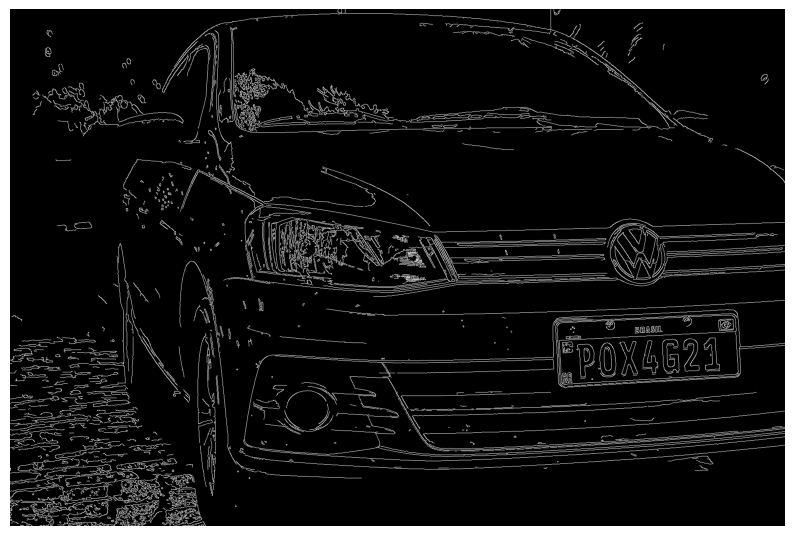

In [37]:
bordas = cv2.Canny(imagem, 100, 200)
display_image(bordas)

In [38]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Organizar os contornos do de maior área para o de menor e guardar os 10 primeiros:
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10] 

In [39]:
for contorno in contornos:
    episolon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, episolon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

print(localizacao)

[[[1659  737]]

 [[1656  835]]

 [[1260  850]]

 [[1259  756]]]


In [40]:
x, y, w, h = cv2.boundingRect(localizacao)
for elemento in [x, y, w, h]:
    print(elemento)

1259
737
401
114


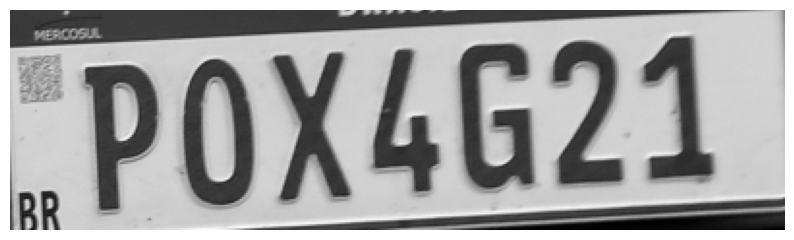

In [41]:
placa = imagem[y:y+h, x:x+w]
display_image(placa)

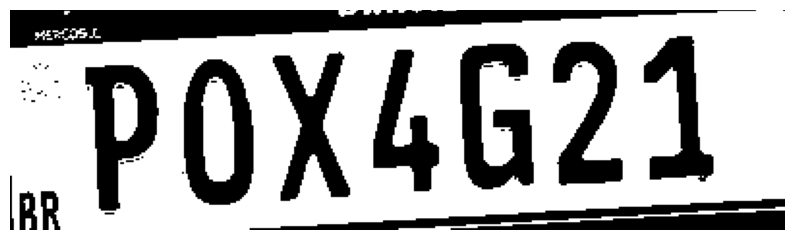

In [42]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display_image(lim_otsu)

In [43]:
texto = pytesseract.image_to_string(lim_otsu, lang="por", config="--psm 6")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

“POX4G24.



In [44]:
texto_extraido = re.search(r'\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido)
print(texto_extraido.group(0))

<re.Match object; span=(1, 8), match='POX4G24'>
POX4G24


## Aula 05 - Reconhecimento Automatizado

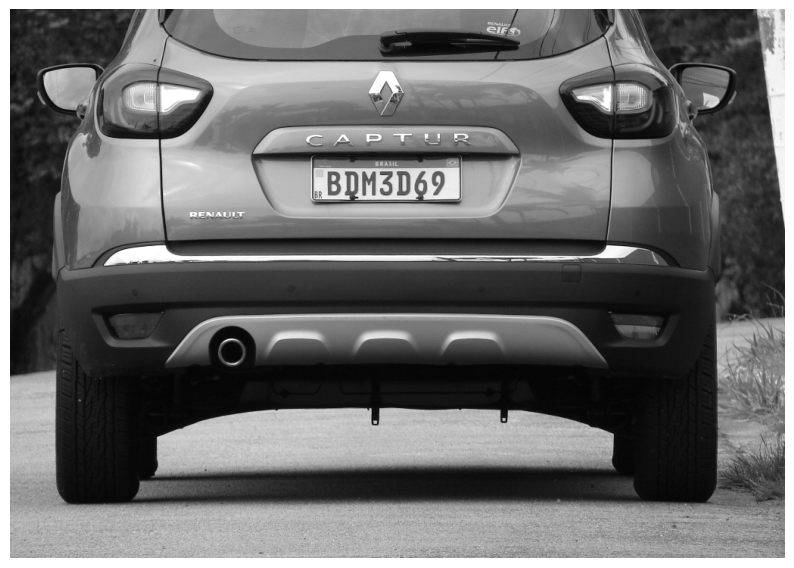

In [45]:
imagem = cv2.imread("imagens\placa_carro3.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
display_image(imagem)

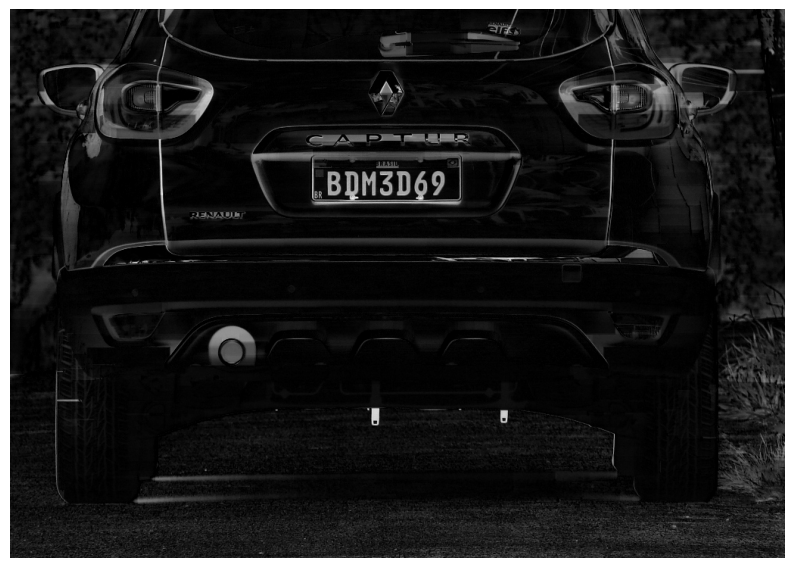

In [46]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
display_image(chapeu_preto)

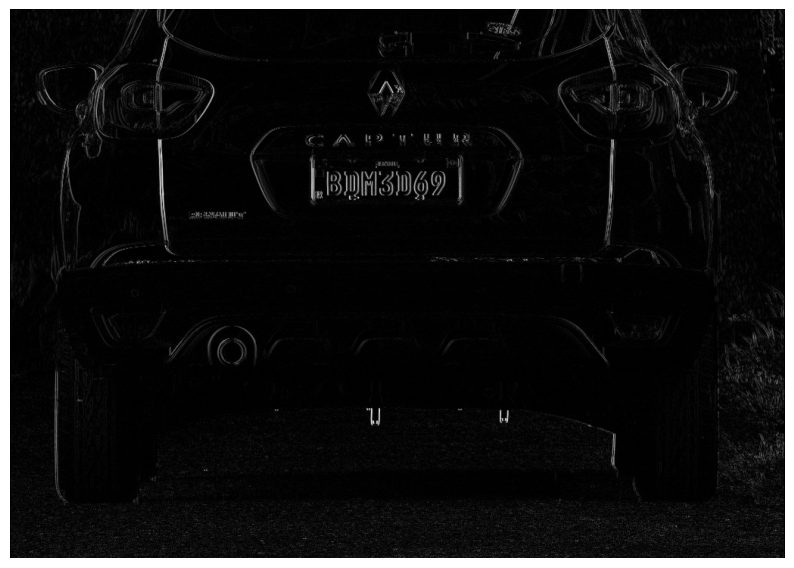

In [47]:
sobel_x = cv2.Sobel(chapeu_preto, ddepth = cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
display_image(sobel_x)

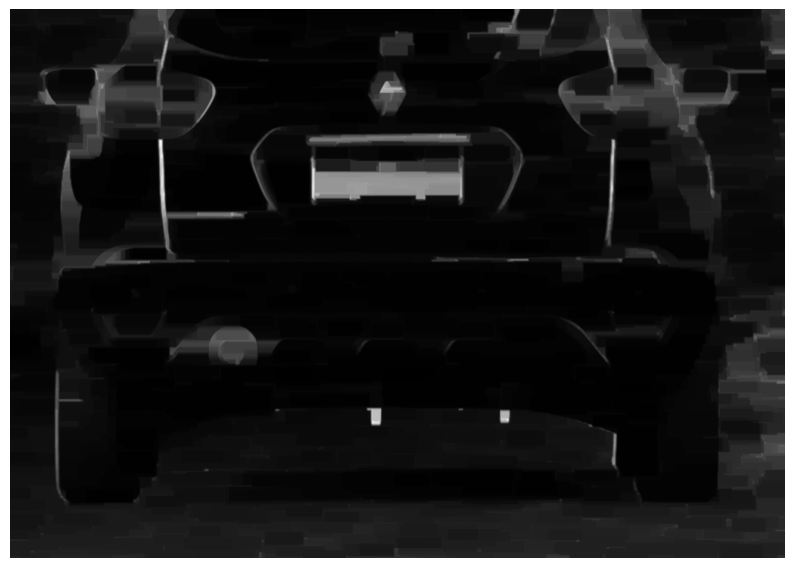

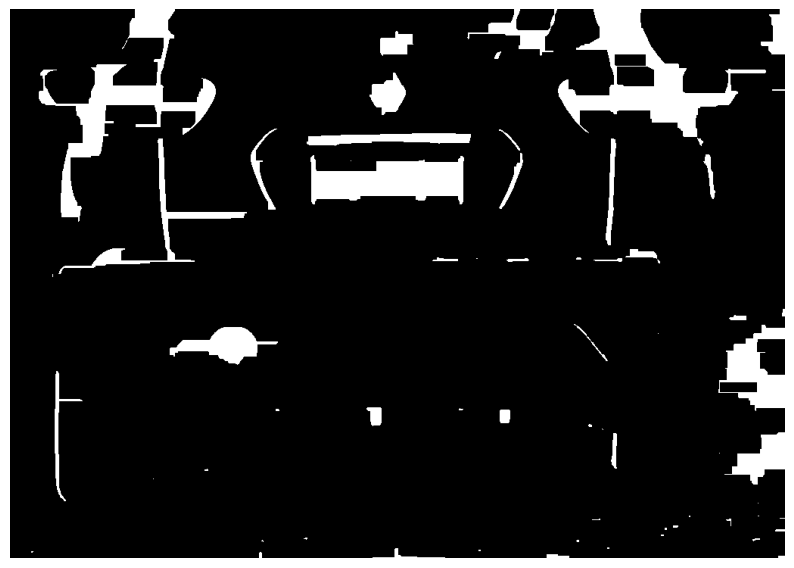

In [48]:
sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
display_image(sobel_x)
valor, limiarizacao = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display_image(limiarizacao)

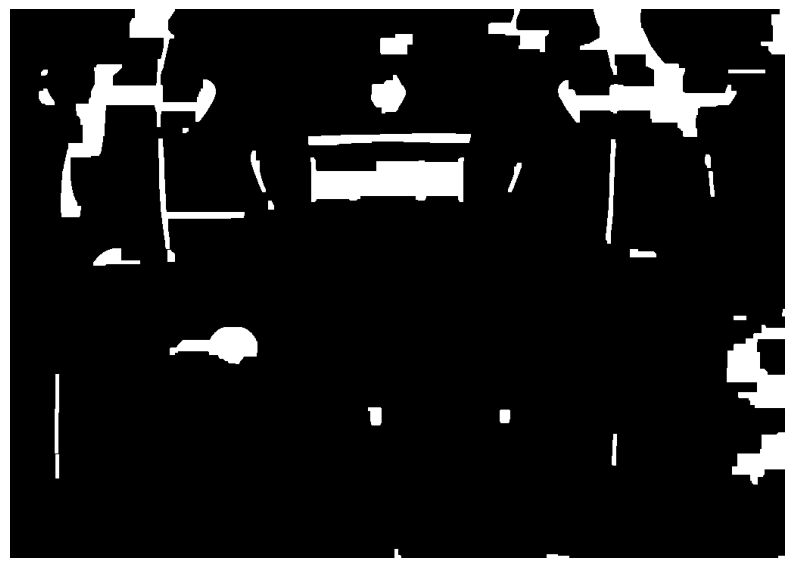

In [49]:
kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado, iterations=2)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations=2)
display_image(limiarizacao)

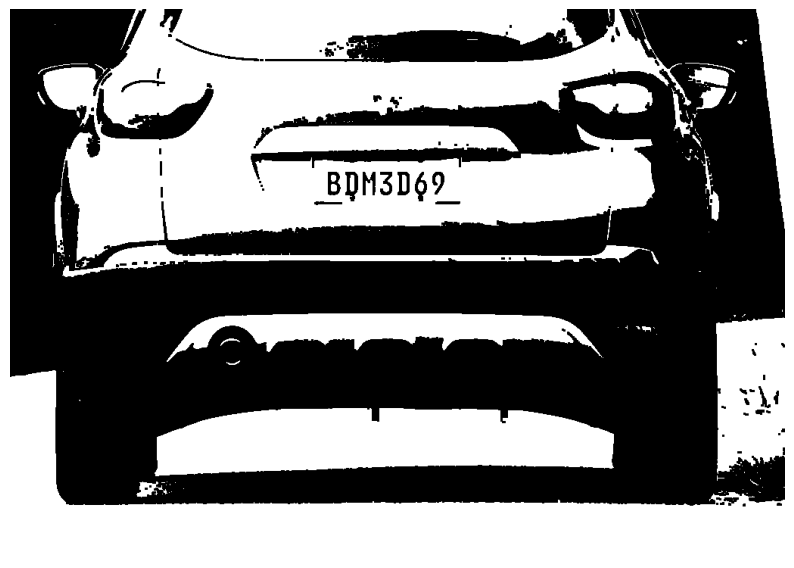

In [50]:
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display_image(mascara)

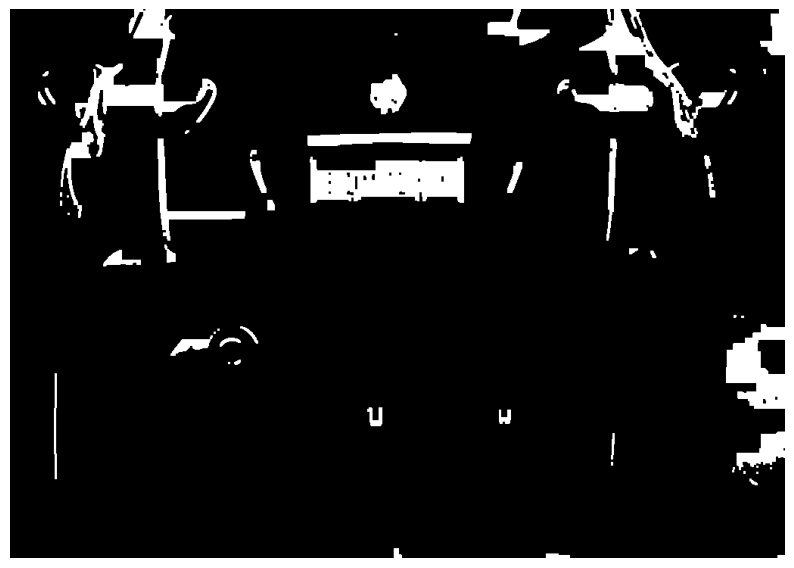

In [51]:
limiarizacao = cv2.bitwise_and(limiarizacao, limiarizacao, mask = mascara)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations=2)
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado)
display_image(limiarizacao)

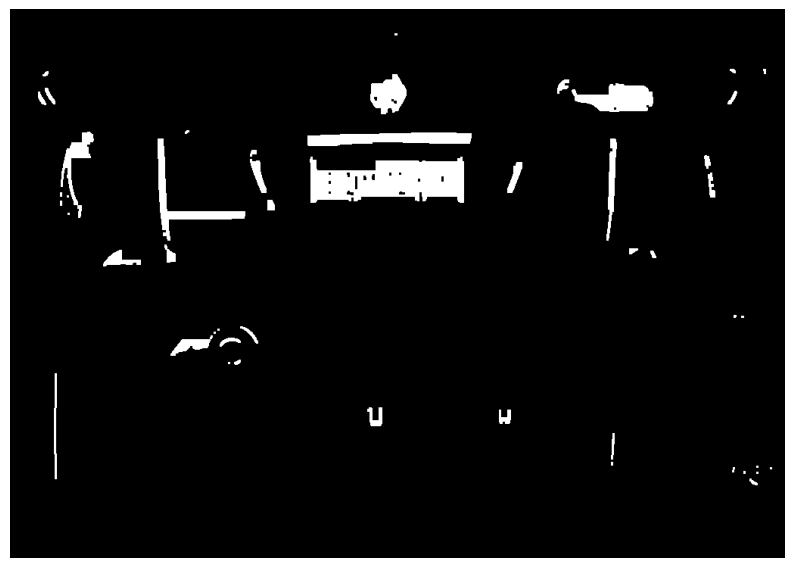

In [52]:
limiarizacao = clear_border(limiarizacao)
display_image(limiarizacao)

In [53]:
contornos, hierarquia = cv2.findContours(limiarizacao, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Organizar os contornos do de maior área para o de menor e guardar os 10 primeiros:
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10] 

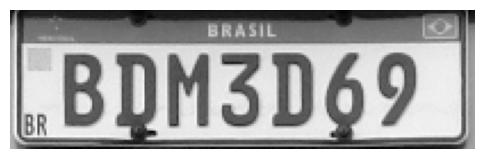

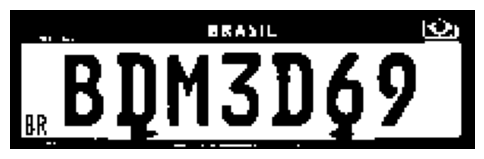

In [54]:
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    proporcao = float(w)/h
    if proporcao >= 3 and proporcao <= 3.5:
        placa = imagem[y:y+h, x:x+w]
        valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        regiao_interesse = clear_border(regiao_interesse)
        display_image(placa, (6,6))
        display_image(regiao_interesse, (6,6))

In [55]:
texto = pytesseract.image_to_string(regiao_interesse, lang="por", config="--psm 6")
print(texto) if texto else print("-- TEXTO NÃO ENCONTRADO --")

BDM3D69.



In [56]:
texto_extraido = re.search(r'\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido)

<re.Match object; span=(0, 7), match='BDM3D69'>


In [57]:
print(texto_extraido.group(0))

BDM3D69
